### Predicting Customer Purchase Behavior

#### Steps:

1. Problem statement
2. Data collection
3. Data checks to perform
4. Exploratory data analysis
5. Conclusions from EDA
6. Data preprocessing
7. Model training
8. Choose best modelt model

### 1. Problem statement

To build a machine learning model that predicts whether a customer will make a purchase (Purchase_History) based on various customer-related
features.

### 2. Data Collection

#### 2.1 Importing dataset and required packages

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Import the csv file as a Dataframe

In [6]:
a=pd.read_csv('Retail_Customer_Insights.csv')

Making a copy of the dataframe

In [8]:
df=a.copy()

Display first 5 rows

In [10]:
df.head()

,Customer_ID,Age,Annual_Income,Gender,Purchase_History,Product_Category,Customer_Satisfaction,Loyalty_Points,Marital_Status,Number_of_Children,Employment_Status,Credit_Score,Owns_House,Monthly_Expenditure,Internet_Usage_Hours_per_Week
0,CID770487,45,72633.53,Non-binary,0,Electronics,9.0,541.11,Divorced,1,Unemployed,664,False,2159.63,33
1,CID216739,38,61816.55,Non-binary,0,Books,6.0,497.41,Married,3,Unemployed,623,True,1439.88,10
2,CID126225,47,57338.15,Non-binary,0,Grocery,3.0,634.90,Single,1,Student,342,True,1786.38,51
3,CID877572,58,83800.37,Female,0,Furniture,4.0,505.82,Divorced,2,Employed,810,True,NaN,45
4,CID388389,37,64875.12,Male,0,Furniture,6.0,610.39,Single,1,Student,692,True,1235.51,-9223372036854775808


Shape of the dataset

In [12]:
df.shape

(100000, 15)

#### 2.2 Dataset Information

1. Customer_ID: Unique identifier for each customer
2. Age: Age of the customer in years.
3. Annual_Income: Annual income of the customer in USD
4. Gender: Gender of the customer.
5. Purchase_History: Indicator of whether the customer has made a purchase (1) or not (0)
6. Product_Category: Category of products the customer is interested in or has purchased.
7. Customer_Satisfaction: Customer satisfaction on a scale of 1 to 10.
8. Loyalty_Points: Points accumulated by the customer through a loyalty program
9. Marital_Status: Marital status of the customer
10. Number_of_Children: Number of children the customer has.
11. Employment_Status: Employment status of the customer.
12. Credit_Score: Credit score of the customer
13. Owns_House: Indicator of whether the customer owns a house (True) or not (False).
14. Monthly_Expenditure: Estimated monthly expenditure of the customer in USD
15. Internet_Usage_Hours_per_Week: Hours per week the customer spends on the internet

### 3. Data Checks to perform:

3.1. Check data types

3.2. Segregation of numerical and categorical features

3.3. Check Duplicates

3.4. Check missing values

3.5. Check the number of unique values of each column

3.6. Check statistics of data set

3.7. Check for outliers


#### 3.1 Check data types

Converting datatype of feature 'Owns_House', 'Purchase_History', 'Customer_Satisfaction' and 'Number_of_Children'

In [17]:
cols=['Owns_House', 'Purchase_History', 'Customer_Satisfaction', 'Number_of_Children']
for i in cols:
    df[i]=df[i].astype('object')

In [18]:
df.dtypes

Customer_ID                       object
Age                                int64
Annual_Income                    float64
Gender                            object
Purchase_History                  object
Product_Category                  object
Customer_Satisfaction             object
Loyalty_Points                   float64
Marital_Status                    object
Number_of_Children                object
Employment_Status                 object
Credit_Score                       int64
Owns_House                        object
Monthly_Expenditure              float64
Internet_Usage_Hours_per_Week      int64
dtype: object

#### 3.2 Segregation of numerical and categorical features

Dropping feature which is non relevant in both EDA and Model Training

In [21]:
df.drop(columns=['Customer_ID'],inplace=True)

Creating a list of numerical and categorical features

In [23]:
num_cols= [feature for feature in df.columns if df[feature].dtype!='object']
cat_cols= [feature for feature in df.columns if df[feature].dtype=='object']
print(f'Numerical features are {num_cols}')
print(f'Categorical fetaures are {cat_cols}')

Numerical features are ['Age', 'Annual_Income', 'Loyalty_Points', 'Credit_Score', 'Monthly_Expenditure', 'Internet_Usage_Hours_per_Week']
Categorical fetaures are ['Gender', 'Purchase_History', 'Product_Category', 'Customer_Satisfaction', 'Marital_Status', 'Number_of_Children', 'Employment_Status', 'Owns_House']


#### 3.3 Checking Duplicates

In [25]:
df.duplicated().sum()

0

 There are no duplicate values in our dataset.

#### 3.4 Check missing values

In [31]:
df.isnull().sum()

Age                                 0
Annual_Income                    5000
Gender                              0
Purchase_History                    0
Product_Category                    0
Customer_Satisfaction            3000
Loyalty_Points                   2000
Marital_Status                      0
Number_of_Children                  0
Employment_Status                   0
Credit_Score                        0
Owns_House                          0
Monthly_Expenditure              5000
Internet_Usage_Hours_per_Week       0
dtype: int64

In [32]:
# Using fillna method to fill missing values with median and mode values
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())
for col in cat_cols:
    modes = df[col].mode()
    if len(modes) > 1:
        second_mode = modes[1]  
    else:
        second_mode = modes[0] 
    df[col].fillna(second_mode, inplace=True)     

In [34]:
# Missing values after imputing
df.isnull().sum()

Age                              0
Annual_Income                    0
Gender                           0
Purchase_History                 0
Product_Category                 0
Customer_Satisfaction            0
Loyalty_Points                   0
Marital_Status                   0
Number_of_Children               0
Employment_Status                0
Credit_Score                     0
Owns_House                       0
Monthly_Expenditure              0
Internet_Usage_Hours_per_Week    0
dtype: int64

#### 3.5 Check the number of unique values of each column

In [37]:
for col in cat_cols:
    unique_values = df[col].unique()
    print(f"Unique values in '{col}': {unique_values}")

Unique values in 'Gender': ['Non-binary' 'Female' 'Male' 'Prefer not to say']
Unique values in 'Purchase_History': [0 1]
Unique values in 'Product_Category': ['Electronics' 'Books' 'Grocery' 'Furniture' 'Clothing']
Unique values in 'Customer_Satisfaction': [ 9.  6.  3.  4.  1.  7.  8. 10.  2.  5.]
Unique values in 'Marital_Status': ['Divorced' 'Married' 'Single' 'Widowed']
Unique values in 'Number_of_Children': [1 3 2 4 0 -9223372036854775808]
Unique values in 'Employment_Status': ['Unemployed' 'Student' 'Employed' 'Retired']
Unique values in 'Owns_House': [False True]


#### 3.6 Check statistics of data set

In [44]:
df.describe()

,Age,Annual_Income,Customer_Satisfaction,Loyalty_Points,Credit_Score,Monthly_Expenditure,Internet_Usage_Hours_per_Week
count,1.000000e+05,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,1.000000e+05
mean,-4.611686e+17,61117.328294,5.676540,499.546544,-3.689349e+17,1997.923621,-3.689349e+17
std,2.010197e+18,18969.273783,2.951135,99.099951,1.807413e+18,487.523957,1.807413e+18
min,-9.223372e+18,-7091.710000,1.000000,37.180000,-9.223372e+18,-207.590000,-9.223372e+18
25%,3.000000e+01,50652.135000,3.000000,433.800000,4.200000e+02,1684.380000,1.700000e+01
50%,3.900000e+01,60161.030000,6.000000,499.255000,5.630000e+02,1997.545000,3.100000e+01
75%,4.700000e+01,69848.612500,8.000000,565.280000,7.060000e+02,2315.502500,4.500000e+01
max,9.300000e+01,319745.700000,10.000000,932.410000,8.490000e+02,4182.640000,5.900000e+01


We can observe incorrect data has been entered into some features like Age, Number_of_Children, Credit_Score and Internet_Usage_Hours_per_Week. So a function to validate the input entered into the features is required.

In [49]:
def validate(min,max,col_name):
    median_col= df[(df[col_name]>=min)&(df[col_name]<=max)][col_name].median()
    df.loc[(df[col_name]<min)|(df[col_name]>max),col_name]=median_col

validate(3,93,'Age')
validate(0,4,'Number_of_Children')
validate(0,849,'Credit_Score')
validate(0,59,'Internet_Usage_Hours_per_Week')

In [51]:
for col in cat_cols:
    print(f'{col}---->{df[col].unique()}')

Gender---->['Non-binary' 'Female' 'Male' 'Prefer not to say']
Purchase_History---->[0 1]
Product_Category---->['Electronics' 'Books' 'Grocery' 'Furniture' 'Clothing']
Customer_Satisfaction---->[ 9.  6.  3.  4.  1.  7.  8. 10.  2.  5.]
Marital_Status---->['Divorced' 'Married' 'Single' 'Widowed']
Number_of_Children---->[1 3 2 4 0]
Employment_Status---->['Unemployed' 'Student' 'Employed' 'Retired']
Owns_House---->[False True]


#### 3.7 Check for Outliers

In [53]:
def find_and_replace_outliers_z_score(df):
    outliers = {}
    z_scores_dict = {}
    
    for col in df.select_dtypes(include=[np.number]).columns:
        # Calculate Z-scores for the column
        z_scores = (df[col] - df[col].mean()) / df[col].std()
        
        # Identify outliers as those having a Z-score greater than 3 or less than -3
        outliers_mask = np.abs(z_scores) > 3
        outliers_count = outliers_mask.sum()
        
        # Store the count of outliers in a dictionary
        outliers[col] = outliers_count
        z_scores_dict[col] = outliers_mask
        
        # Replace outliers with the median of the column
        median_value = df[col].median()
        df.loc[outliers_mask, col] = median_value
    
    return outliers, z_scores_dict, df

outliers, z_scores, df_cleaned = find_and_replace_outliers_z_score(df)

print("Outliers count per column:")
print(outliers)

# Assigning cleaned data in df variable
df_cleaned =df

Outliers count per column:
{'Age': 245, 'Annual_Income': 865, 'Customer_Satisfaction': 0, 'Loyalty_Points': 307, 'Credit_Score': 0, 'Monthly_Expenditure': 335, 'Internet_Usage_Hours_per_Week': 0}


The outliers in the above columns have to be replaced by median because they can affect disproportionately the estimated coefficients in case of logistic regression as it assumes a linear relationship between variables. 

### 4. Exploratory Data Analysis

#### 4.1 Age column:

Is average age affecting the purchase history?

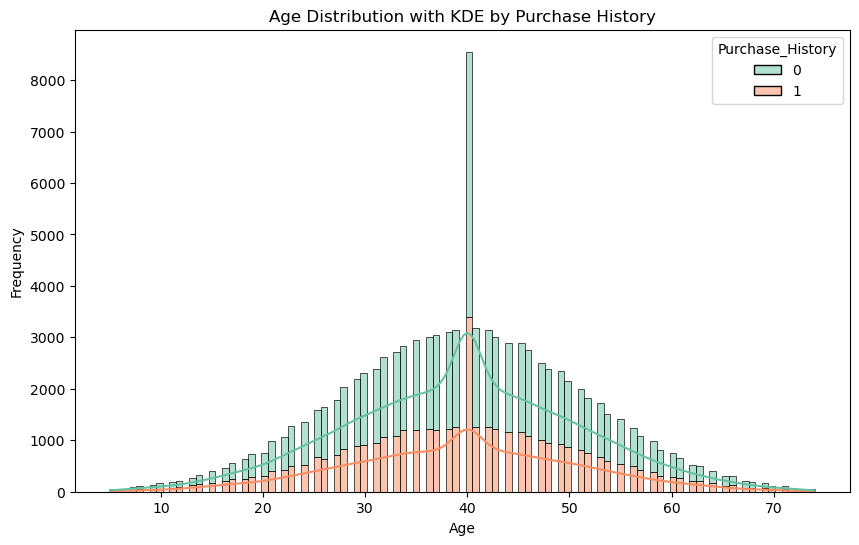

In [60]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Purchase_History', kde=True, palette='Set2', multiple='stack')
plt.title('Age Distribution with KDE by Purchase History')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

The majority of customers fall within the age range of 30 to 50 years.

#### 4.2 Annual Income column:

Is average annual income affecting purchase history?

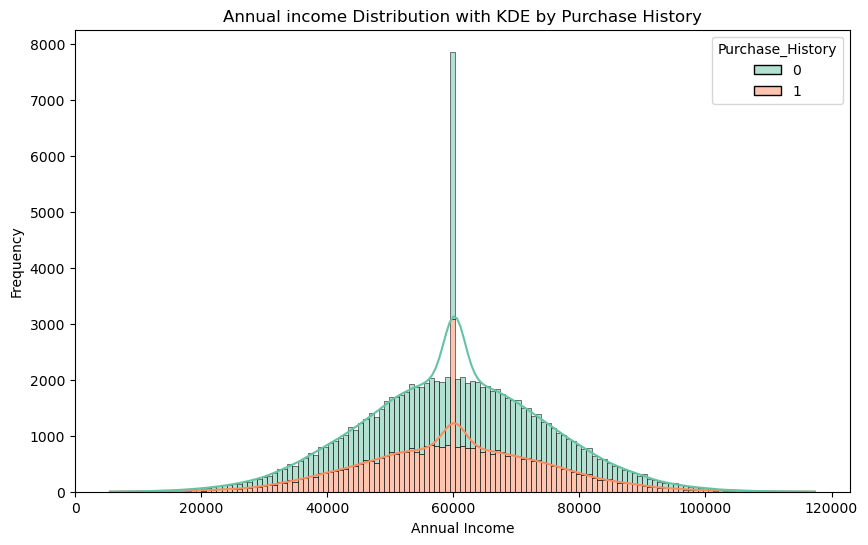

In [66]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Annual_Income', hue='Purchase_History', kde=True, palette='Set2', multiple='stack')
plt.title('Annual income Distribution with KDE by Purchase History')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()

The annual income of most of the customers lies in range of 40,000 to 80,000 even after adjusting the values of outliers and missing values.

#### 4.3 Gender column distribution:

##### 4.3.1 Univariate analysis

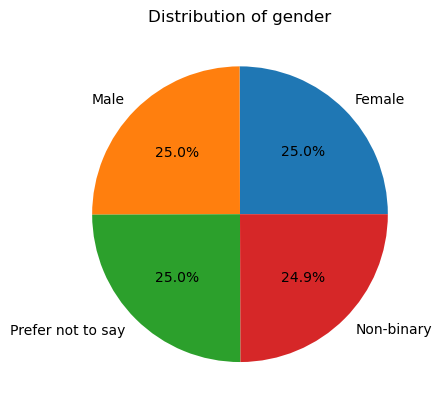

In [70]:
plt.pie(df['Gender'].value_counts(),labels=['Female','Male','Prefer not to say','Non-binary'], autopct='%1.1f%%')
plt.title('Distribution of gender')
plt.show()

The gender of customers is almost equally distributed.

##### 4.3.2 Bivariate analysis

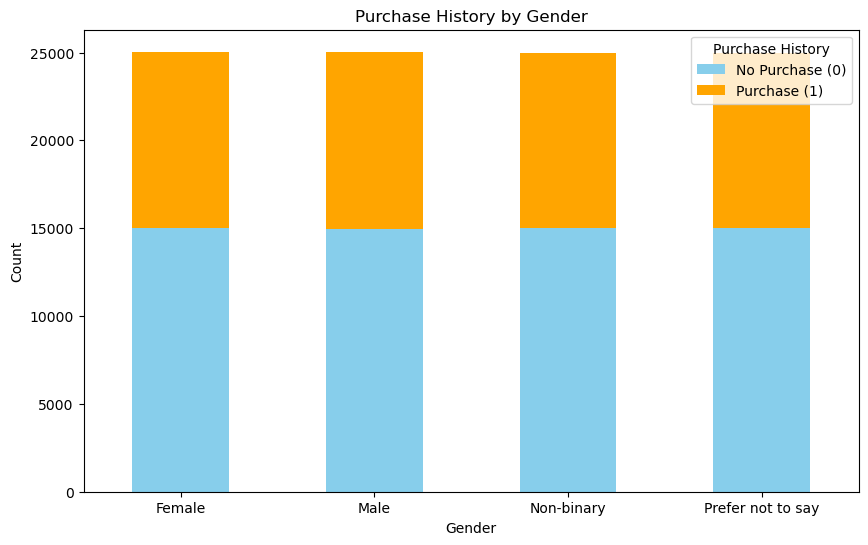

In [73]:
cross_tab = pd.crosstab(df['Gender'], df['Purchase_History'])
cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'orange'])
plt.title('Purchase History by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Purchase History', labels=['No Purchase (0)', 'Purchase (1)'])
plt.show()

Among all the genders there are more customers who do not have a purchase history

#### 4.4 Product category column:

##### 4.4.1 Unvariate analysis

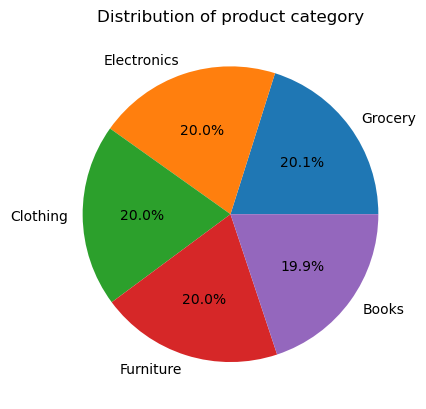

In [77]:
product_category_counts = df['Product_Category'].value_counts()
plt.pie(product_category_counts, labels=product_category_counts.index, autopct='%1.1f%%')
plt.title('Distribution of product category')
plt.show()

Each product category has almost one-fifth of the customers.

##### 4.4.2 Bivariate analysis

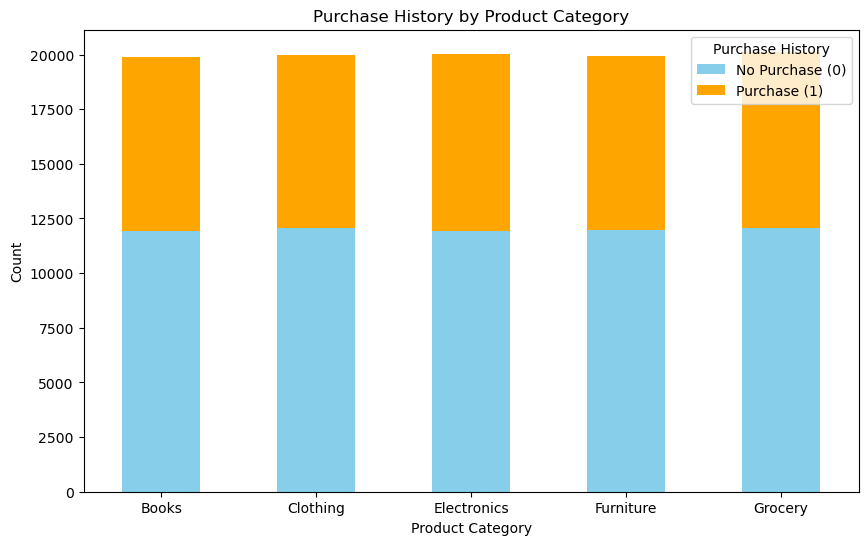

In [80]:
cross_tab = pd.crosstab(df['Product_Category'], df['Purchase_History'])
cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'orange'])
plt.title('Purchase History by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Purchase History', labels=['No Purchase (0)', 'Purchase (1)'])
plt.show()

Among all product categories there are more customers who do not have a purchase history

##### 4.4.2 Multivariate analysis

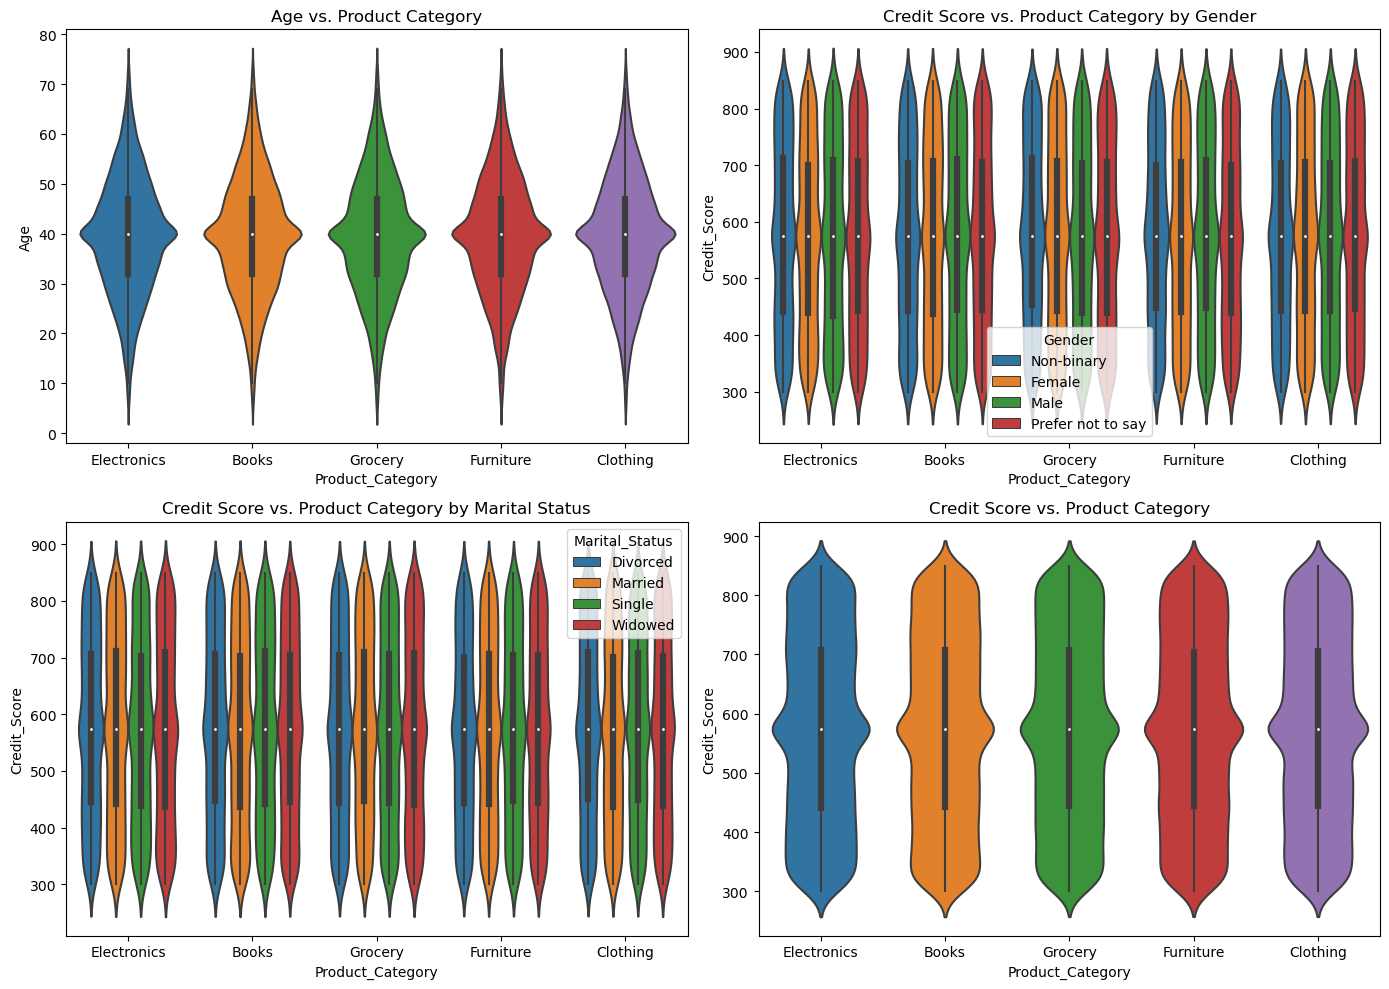

In [83]:
plt.figure(figsize=(14, 10))

# Violin plot for Age vs. Product Category
plt.subplot(2, 2, 1)
sns.violinplot(x='Product_Category', y='Age', data=df)
plt.title('Age vs. Product Category')

# Violin plot for Gender vs. Product Category
plt.subplot(2, 2, 2)
sns.violinplot(x='Product_Category', y='Credit_Score', hue='Gender', data=df)
plt.title('Credit Score vs. Product Category by Gender')

# Violin plot for Marital Status vs. Product Category
plt.subplot(2, 2, 3)
sns.violinplot(x='Product_Category', y='Credit_Score', hue='Marital_Status', data=df)
plt.title('Credit Score vs. Product Category by Marital Status')

# Violin plot for Credit Score vs. Product Category
plt.subplot(2, 2, 4)
sns.violinplot(x='Product_Category', y='Credit_Score', data=df)
plt.title('Credit Score vs. Product Category')

# Display the plots
plt.tight_layout()
plt.show()

There is no significant variation in product categories with respect to gender,age,martial status or credit score.

#### 4.5 Customer Satisfaction

#### 4.5.1 Univariate analysis

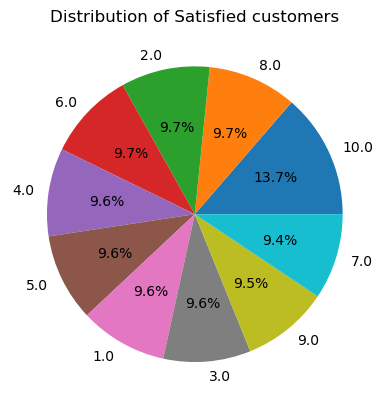

In [88]:
customer_satifaction= df['Customer_Satisfaction'].value_counts()
plt.pie(customer_satifaction,labels=customer_satifaction.index, autopct='%1.1f%%')
plt.title('Distribution of Satisfied customers')
plt.show()

Most of the customers have given a 10 rating for satifaction due to imputing the missing values. Other rating numbers are equally distributed among customers.

##### 4.5.2 Bivariate analysis

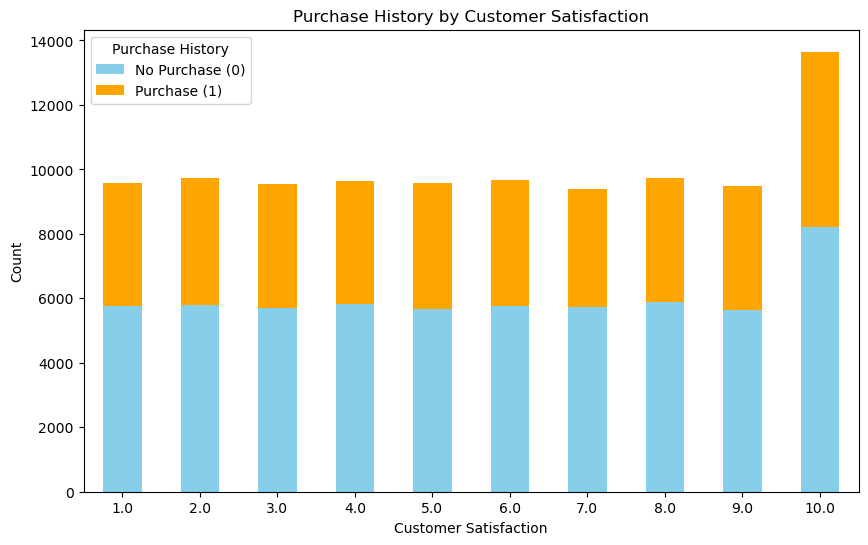

In [91]:
cross_tab = pd.crosstab(df['Customer_Satisfaction'], df['Purchase_History'])
cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'orange'])
plt.title('Purchase History by Customer Satisfaction')
plt.xlabel('Customer Satisfaction')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Purchase History', labels=['No Purchase (0)', 'Purchase (1)'])
plt.show()

The increase in 10 star rating is due to imputing the missing values. Overall, there is no significant variation.

#### 4.6 Loyalty points column:

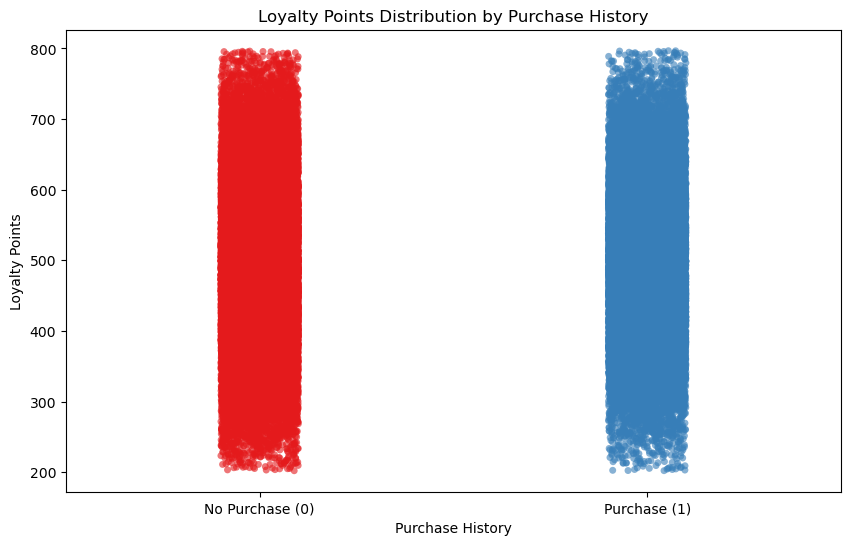

In [94]:
plt.figure(figsize=(10, 6))
sns.stripplot(x='Purchase_History', y='Loyalty_Points', data=df, jitter=True, palette='Set1', alpha=0.6)
plt.title('Loyalty Points Distribution by Purchase History')
plt.xlabel('Purchase History')
plt.ylabel('Loyalty Points')
plt.xticks([0, 1], ['No Purchase (0)', 'Purchase (1)'])
plt.show()

The loyalty points are distributed almost equally among the the customers who have a purchase history and others who do not have a purchase history.

#### 4.7 Marital Status column:

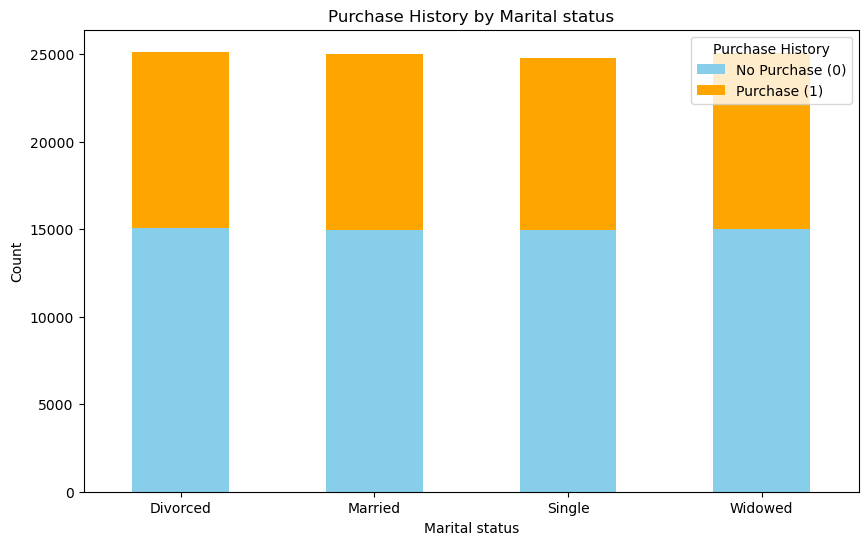

In [97]:
cross_tab = pd.crosstab(df['Marital_Status'], df['Purchase_History'])
cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'orange'])
plt.title('Purchase History by Marital status')
plt.xlabel('Marital status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Purchase History', labels=['No Purchase (0)', 'Purchase (1)'])
plt.show()

All marital status categories have more number of customers who do not have a purchase history.

#### 4.8 Number of children column:

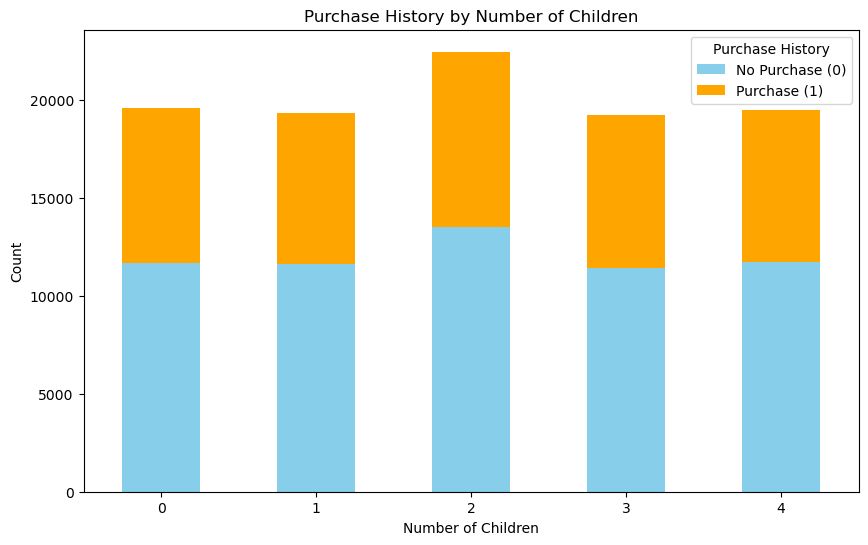

In [100]:
cross_tab = pd.crosstab(df['Number_of_Children'], df['Purchase_History'])
cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'orange'])
plt.title('Purchase History by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Purchase History', labels=['No Purchase (0)', 'Purchase (1)'])
plt.show()

Most number of customers have 2 children and hence more of the customers having 2 children are not having a purchase history

#### 4.9 Employment Status:

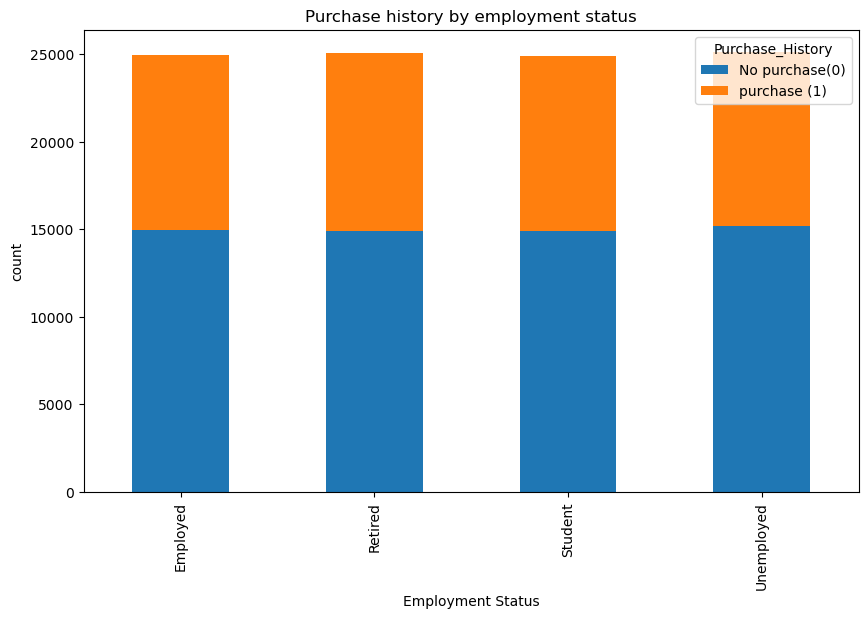

In [103]:
cross_tab= pd.crosstab(df['Employment_Status'],df['Purchase_History'])
cross_tab.plot(kind='bar',stacked= True, figsize=(10,6))
plt.title('Purchase history by employment status')
plt.xlabel('Employment Status')
plt.ylabel('count')
plt.legend(title='Purchase_History',labels=['No purchase(0)','purchase (1)'])
plt.show()

An equal number of customers from each employment status category do not have a purchase history.

#### 4.10 Credit score column:

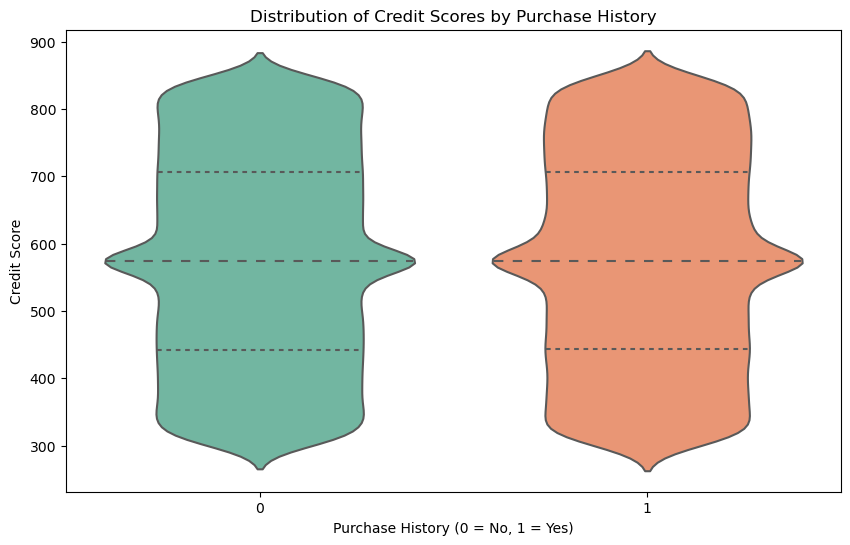

In [106]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Purchase_History', y='Credit_Score', data=df, inner='quartile', palette='Set2')
plt.title('Distribution of Credit Scores by Purchase History')
plt.xlabel('Purchase History (0 = No, 1 = Yes)')
plt.ylabel('Credit Score')
plt.show()

Distribution of credit scores is similar among customers with purchase history and no purchase history

#### 4.11 Own's House, Monthly expenditure and Internet usage per week columns:

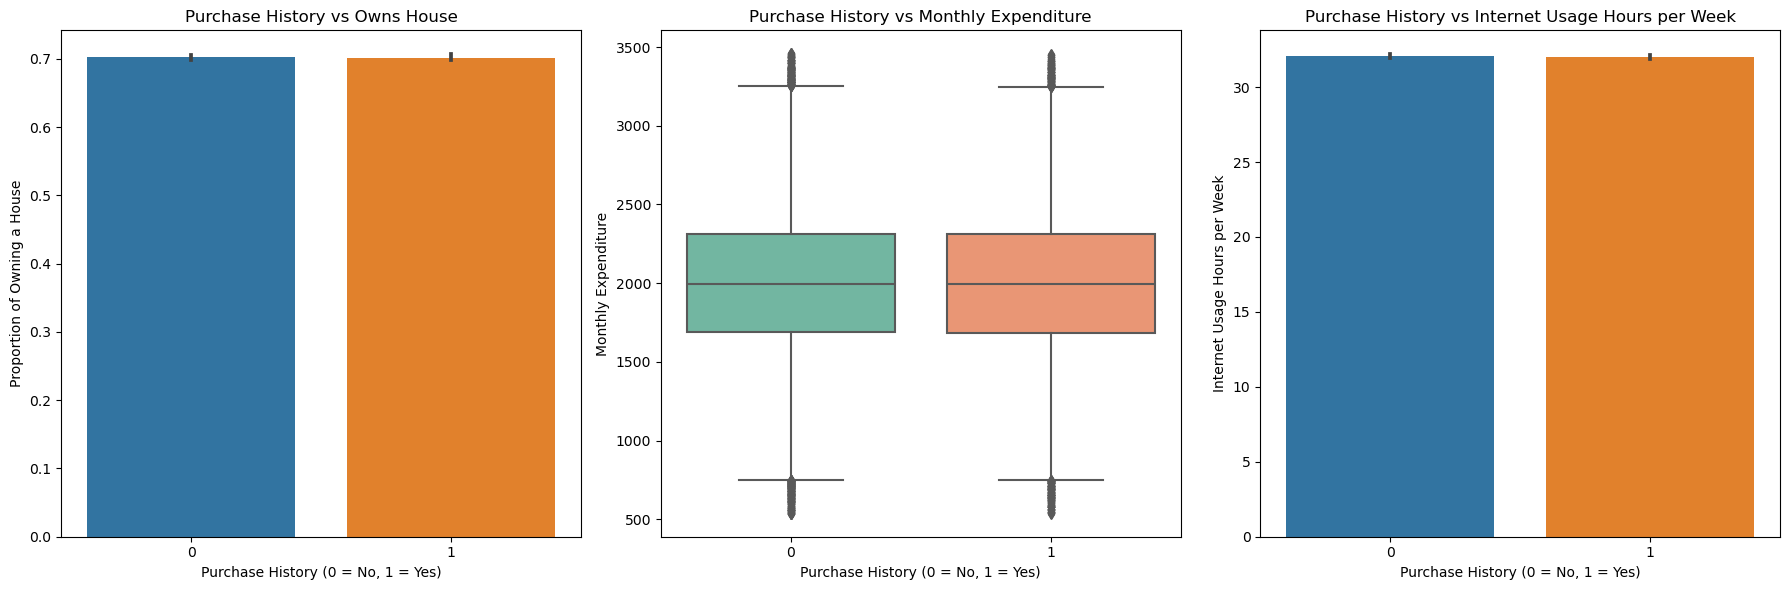

In [109]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Bar plot for Purchase History vs Owns House
sns.barplot(x=df['Purchase_History'], y=df['Owns_House'], ax=axes[0])
axes[0].set_title('Purchase History vs Owns House')
axes[0].set_xlabel('Purchase History (0 = No, 1 = Yes)')
axes[0].set_ylabel('Proportion of Owning a House')

# Plot 2: Box plot for Purchase History vs Monthly Expenditure
sns.boxplot(x='Purchase_History', y='Monthly_Expenditure', data=df, palette='Set2', ax=axes[1])
axes[1].set_title('Purchase History vs Monthly Expenditure')
axes[1].set_xlabel('Purchase History (0 = No, 1 = Yes)')
axes[1].set_ylabel('Monthly Expenditure')

# Plot 3: Bar plot for Purchase History vs Internet Usage Hours per Week
sns.barplot(x=df['Purchase_History'], y=df['Internet_Usage_Hours_per_Week'], ax=axes[2])
axes[2].set_title('Purchase History vs Internet Usage Hours per Week')
axes[2].set_xlabel('Purchase History (0 = No, 1 = Yes)')
axes[2].set_ylabel('Internet Usage Hours per Week')

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()

There is no much variation in number of customers owning a house with respect to purchase history.

There is no much variation in monthly expenditure of the customers with respect to purchase history.

There is no much variation in average internet usage per week for customers that are having and not having purchase history.

#### 4.12 Correlation heatmap 

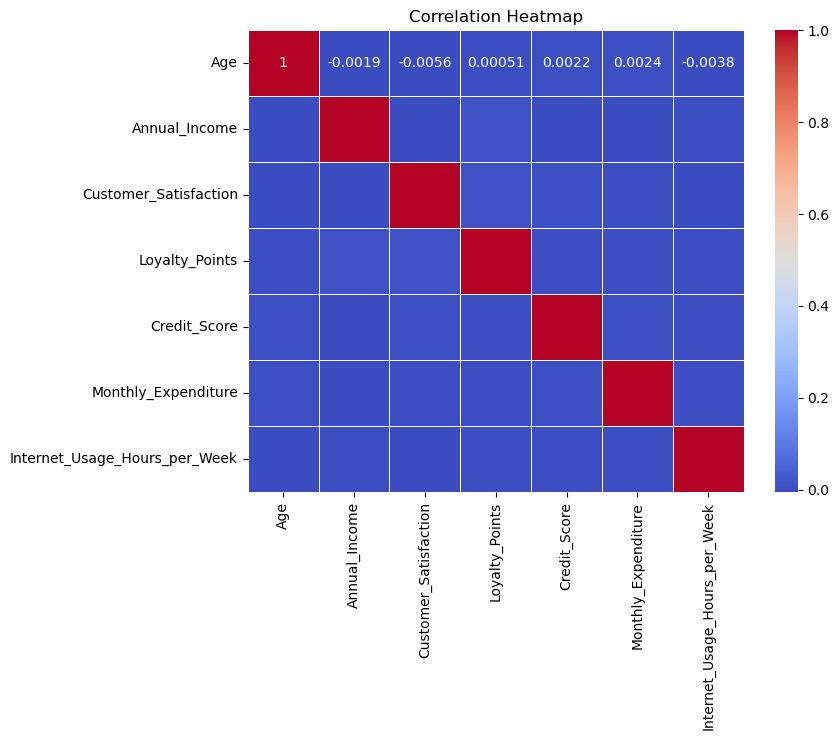

In [115]:
corr = df.corr(numeric_only=True)

# Create a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### 5. Conclusions from EDA

##### These conclusions are only for features that show significant variation

1. The majority of customers fall within the age range of 30 to 50 years.

2. The annual income of most of the customers lies in range of 40,000 to 80,000

3. Most number of customers have 2 children and also more of the customers having 2 children are not having a purchase history

### 6. Data Preprocessing 

##### Removing Purchase History from categorical columns

In [120]:
a=[]
for i in cat_cols:
    if i!='Purchase_History':
        a.append(i)

#### 6.1 Encoding the categorical features and scaling the numerical features

In [124]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

scaler = StandardScaler()
encoder = OneHotEncoder(drop='first', sparse=False)  # drop='first' to avoid dummy variable trap

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, num_cols),
        ('cat', encoder, a)
    ]
)

# Apply preprocessing
preprocessed_array = preprocessor.fit_transform(df)

# Get feature names after one-hot encoding
cat_feature_names = preprocessor.transformers_[1][1].get_feature_names_out(a)
all_feature_names = num_cols + list(cat_feature_names)

# Create a DataFrame with preprocessed data
preprocessed_df = pd.DataFrame(preprocessed_array, columns=all_feature_names)

In [125]:
# Converting Purchase history datatype
df['Purchase_History']=df['Purchase_History'].astype('float')

In [126]:
# Defining X and y
X= preprocessed_df
y= df['Purchase_History']

#### 6.3 Apply SMOTE

In [128]:
from imblearn.over_sampling import SMOTE

smote= SMOTE(random_state=42)
X_resampled, y_resampled= smote.fit_resample(X,y)

### 7. Model Training Using Random Forest Algorithm

#### 7.1 Train test split and Initializing model

In [200]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,roc_curve,auc,confusion_matrix

#Using train test split
x_train, x_test, y_train, y_test= train_test_split(X_resampled,y_resampled,test_size=0.1,random_state=42)
rf_model= RandomForestClassifier(random_state=42)

#### 7.2 Hyperparameter Tuning/Optimization using GridSearchCV

In [585]:
import time 
from sklearn.model_selection import GridSearchCV

start= time.time()
param_dict= {'max_depth':[5,6,7,8],
            'criterion': ['gini','entropy'],
             'bootstrap': [True,False],
             'max_features':['auto','log2','sqrt']
            }

cv_rf= GridSearchCV(rf_model,cv=10, param_grid= param_dict,n_jobs=-1)
cv_rf.fit(x_train,y_train)

end=time.time()
print(f'Time taken to execute is {end-start}')

Time taken to execute is 2279.9555134773254


In [589]:
print('Best parameters are ',cv_rf.best_params_)

Best parameters are  {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto'}


#### 7.3 OOB Rate

In [142]:
# OOB error graph
import time
start =time.time()
rf_model.set_params(warm_start= True,oob_score=True)
min=100
max=600
error_rate={}

for i in range(min,max+1):
    rf_model.set_params(n_estimators=i)
    rf_model.fit(x_train,y_train)
    oob_error= 1-rf_model.oob_score_
    error_rate[i]=oob_error
end= time.time()
print('Time taken to complete is',(end-start))

Time taken to complete is 4285.797231435776


Text(0.5, 1.0, 'OOB Error Rate across various forest sizes')

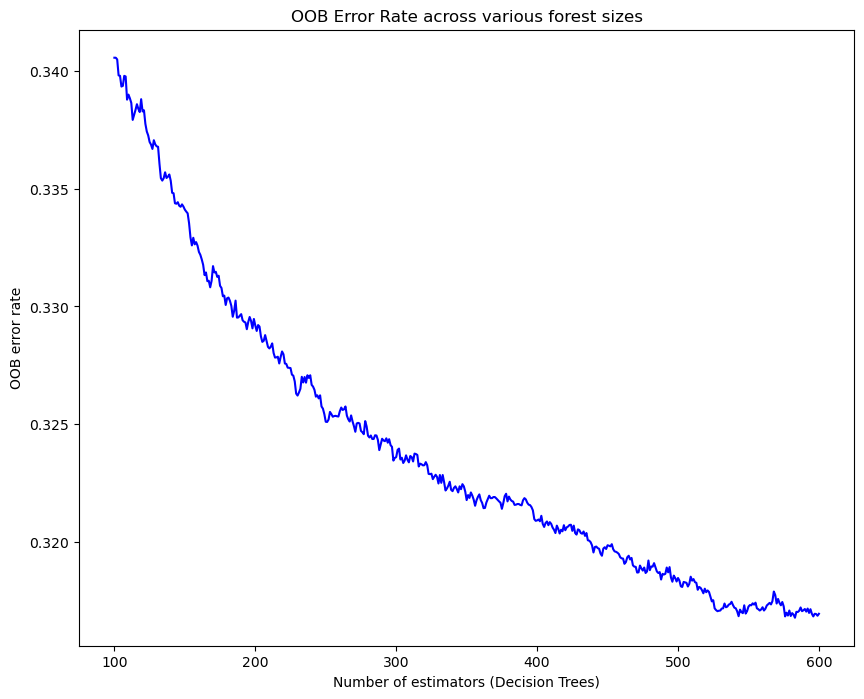

In [146]:
#Plotting OOB rate
plt.figure(figsize=(10,8))
oob_series.plot(kind='line',color='blue')
plt.xlabel('Number of estimators (Decision Trees)')
plt.ylabel('OOB error rate')
plt.title('OOB Error Rate across various forest sizes')

#### 7.4 Setting best parameters, training the model and finding predictions

In [202]:
rf_model.set_params(n_estimators=500 ,max_depth=12, oob_score=False, warm_start=False,criterion='gini',max_features='log2',bootstrap=True)

RandomForestClassifier(max_depth=12, max_features='log2', n_estimators=500,
                       random_state=42)

In [204]:
#Fit Random Forest model
rf_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=12, max_features='log2', n_estimators=500,
                       random_state=42)

In [206]:
# Training and testong predictions
y_train_pred= rf_model.predict(x_train)
y_test_pred= rf_model.predict(x_test)

In [208]:
#Training accuracy
training_accuracy= accuracy_score(y_train,y_train_pred)
training_accuracy

0.6840549904581921

In [210]:
#Testing accuracy
testing_accuracy= accuracy_score(y_test,y_test_pred)
testing_accuracy

0.6574954143738536

[[53722   285]
 [33820 20119]]


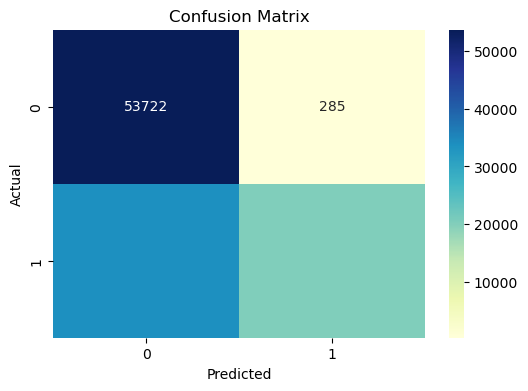

In [257]:
#Confusion matrix for training data
conf_matrix= confusion_matrix(y_train,y_train_pred)
print(conf_matrix)

#Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True,fmt='d', cmap='YlGnBu', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

[[5878   85]
 [4023 2008]]


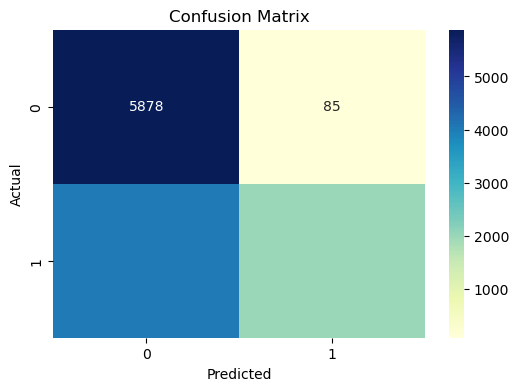

In [255]:
#Confusion matrix for testing data
conf_matrix= confusion_matrix(y_test,y_test_pred)
print(conf_matrix)

#Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True,fmt='d', cmap='YlGnBu', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [234]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

         0.0       0.59      0.99      0.74      5963
         1.0       0.96      0.33      0.49      6031

    accuracy                           0.66     11994
   macro avg       0.78      0.66      0.62     11994
weighted avg       0.78      0.66      0.62     11994



#### 7.5 Finding important features

In [237]:
feature_imp= rf_model.feature_importances_
imp_dict= {'features': X.columns,'importances':feature_imp}
imp_data= pd.DataFrame(imp_dict)
imp_data.sort_values(by='importances',ascending=False)
list(imp_data[imp_data['importances']>0.01]['features'].unique())

['Age',
 'Annual_Income',
 'Loyalty_Points',
 'Credit_Score',
 'Monthly_Expenditure',
 'Internet_Usage_Hours_per_Week',
 'Gender_Male',
 'Gender_Non-binary',
 'Gender_Prefer not to say',
 'Product_Category_Clothing',
 'Product_Category_Electronics',
 'Product_Category_Furniture',
 'Product_Category_Grocery',
 'Customer_Satisfaction_2.0',
 'Customer_Satisfaction_3.0',
 'Customer_Satisfaction_4.0',
 'Customer_Satisfaction_5.0',
 'Customer_Satisfaction_6.0',
 'Customer_Satisfaction_7.0',
 'Customer_Satisfaction_8.0',
 'Customer_Satisfaction_10.0',
 'Marital_Status_Married',
 'Marital_Status_Single',
 'Marital_Status_Widowed',
 'Number_of_Children_1',
 'Number_of_Children_2',
 'Number_of_Children_3',
 'Number_of_Children_4',
 'Employment_Status_Retired',
 'Employment_Status_Student',
 'Employment_Status_Unemployed',
 'Owns_House_True']

### 8. Model Training using KNN and logistic Regression

#### 8.1 Train test split and Initializing model

In [241]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Initializing the models
knn = KNeighborsClassifier(n_neighbors=5)
log_reg= LogisticRegression(
    C= 0.01, penalty= 'l2', solver= 'newton-cg'
)

#### 8.2 Hyperparameter Tuning/Optimization using GridSearchCV¶

In [389]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the model
log_reg = LogisticRegression()

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga'],  # Optimization algorithm
    'penalty': ['l2', 'none']  # Regularization type
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5)

# Fit GridSearchCV
grid_search.fit(x_train, y_train)

# Best parameters
print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}


#### 8.3 Training the models and making predictions

In [243]:
# Fit KNN and logistic Regression
knn.fit(x_train,y_train)
log_reg.fit(x_train,y_train)

LogisticRegression(C=0.01, solver='newton-cg')

In [245]:
from sklearn.metrics import accuracy_score

#Training and testing predictions
y_pred_train_knn= knn.predict(x_train)
y_pred_test_knn= knn.predict(x_test)
y_pred_train_lr= log_reg.predict(x_train)
y_pred_test_lr= log_reg.predict(x_test)

#Training and testing accuracies
knn_training_acc= accuracy_score(y_train,y_pred_train_knn)
knn_testing_acc= accuracy_score(y_test,y_pred_test_knn)
lr_training_acc= accuracy_score(y_train,y_pred_train_lr)
lr_testing_acc= accuracy_score(y_test,y_pred_test_lr)

print(f'knn training accuracy is {knn_training_acc}')
print(f'knn testing accuracy is {knn_testing_acc}')
print(f'log reg training accuracy is {lr_training_acc}')
print(f'log reg testing accuracy is {lr_testing_acc}')


knn training accuracy is 0.746688158894262
knn testing accuracy is 0.5952142738035685
log reg training accuracy is 0.5164341429974246
log reg testing accuracy is 0.5155911288977822


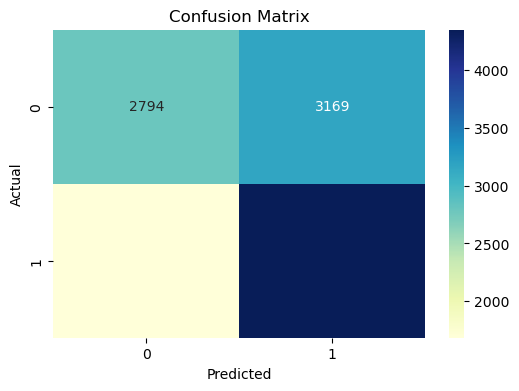

In [253]:
#Confusion matrix for KNN algorithm 
conf_matrix= confusion_matrix(y_test,y_pred_test_knn)

#Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True,fmt='d', cmap='YlGnBu', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

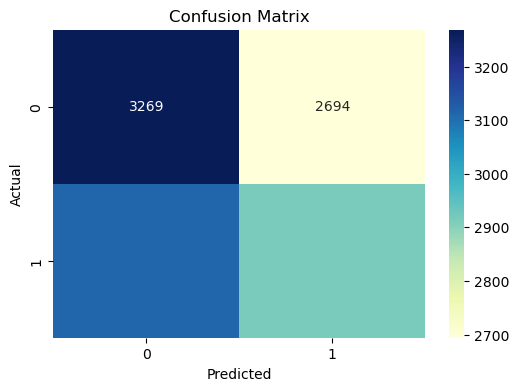

In [251]:
#Confusion matrix for Logistic Regression algorithm
conf_matrix= confusion_matrix(y_test,y_pred_test_lr)

#Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True,fmt='d', cmap='YlGnBu', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [259]:
#Classification report using KNN model
print(classification_report(y_test,y_pred_test_knn))

              precision    recall  f1-score   support

         0.0       0.62      0.47      0.54      5963
         1.0       0.58      0.72      0.64      6031

    accuracy                           0.60     11994
   macro avg       0.60      0.59      0.59     11994
weighted avg       0.60      0.60      0.59     11994



In [261]:
#Classification report using Logisitic Regression model
print(classification_report(y_test,y_pred_test_lr))

              precision    recall  f1-score   support

         0.0       0.51      0.55      0.53      5963
         1.0       0.52      0.48      0.50      6031

    accuracy                           0.52     11994
   macro avg       0.52      0.52      0.52     11994
weighted avg       0.52      0.52      0.52     11994



### 9. Models and their Accuracies

In [304]:
dict= {'Random Forest': [training_accuracy,testing_accuracy],'K- Nearest Neighbors': [knn_training_acc,knn_testing_acc],'Logistic Regression':[lr_training_acc,lr_testing_acc]}
pd.DataFrame(dict,index=['Training accuracies','Testing accuracies'])

,Random Forest,K- Nearest Neighbors,Logistic Regression
Training accuracies,0.684055,0.746688,0.516434
Testing accuracies,0.657495,0.595214,0.515591
